# Mini Project 2 – Consumer Complaint Resolution Analysis Using Python


**Scenario:** Product review is the most basic function/factor in resolving customer issues and increasing the sales growth of any product. We can understand their mindset toward our service without asking each customer.

When consumers are unhappy with some aspect of a business, they reach out to customer service and might raise a complaint. Companies try their best to resolve the complaints that they receive. However, it might not always be possible to appease every customer.

So Here, we will analyze data, and with the help of different algorithms, we are finding the best classification of customer category so that we can predict our test data.

**Objective:** Use Python libraries such as Pandas for data operations, Seaborn and Matplotlib for data visualization and EDA tasks, Sklearn for model building and performance visualization, and based on the best model, make a prediction for the test file and save the output.

The main objective is to predict whether our customer is disputed or not with the help of given data.

## Dataset description:

Customers faced some issues and tried to report their problems to customer care.

**Dispute:** This is our target variable based on train data; we have two groups, one with a dispute with the bank and another don’t have any issue with the bank.

**Date received:** The day complaint was received.

**Product:** different products offered by the bank (credit cards, debit cards, different types of transaction methods, accounts, locker services, and money-related)

**Sub-product:** loan, insurance, other mortgage options

**Issue:** Complaint of customers

**Company public response:** Company’s response to consumer complaint

**Company:** Company name

**State:** State where the customer lives (different state of USA)

**ZIP code:** Where the customer lives

**Submitted via:** Register complaints via different platforms (online web, phone, referral, fax, post mail)

**Date sent to company:** The day complaint was registered

**Timely response?:** Yes/no

**Consumer disputed?:** yes/no (target variable)

**Complaint ID:** unique to each consumer

## Tasks to be performed:

The following tasks are to be performed:

**Note:** Please complete the given steps on both train and test data.

- Read the Data from the Given excel file.

- Check the data type for both data (test file and train file)

- Do missing value analysis and drop columns where more than 25% of data are missing

- Extracting Day, Month, and Year from Date Received Column and create new fields for a month, year, and day

- Calculate the Number of Days the Complaint was with the Company and create a new field as “Days held”

- Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID" fields

- Imputing Null value in “State” by Mode

- with the help of the days we calculated above, create a new field 'Week_Received' where we calculate the week based on the day of receiving.

- store data of disputed people into the “disputed_cons” variable for future tasks

- Plot bar graph of the total no of disputes of consumers with the help of seaborn

- Plot bar graph of the total no of disputes products-wise with the help of seaborn

- Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the help of seaborn

- Plot bar graph of the total no of disputes by State with Maximum Disputes

- Plot bar graph of the total no of disputes Submitted Via different source

- Plot bar graph of the total no of disputes where the Company's Response to the Complaints

- Plot bar graph of the total no of disputes where the Company's Response Leads to Disputes

- Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely Response

- Plot bar graph of the total no of disputes over Year Wise Complaints

- Plot bar graph of the total no of disputes over Year Wise Disputes

- Plot bar graph of Top Companies with Highest Complaints

- Converte all negative days held to zero (it is the time taken by the authority that can't be negative)

- Drop Unnecessary Columns for the Model Building
  like:'Company', 'State', 'Year_Received', 'Days_held'

- Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

- Create Dummy Variables for categorical features and concat with the original data framelike: 'Product,’ 'Submitted via,’ 'Company response to consumer,’ 'Timely response?'

- Scaling the Data Sets (note: discard dependent variable before doing standardization)and Make feature Selection with the help of PCA up to 80% of the information.

- Splitting the Data Sets Into X and Y by the dependent and independent variables (data selected by PCA)

- Build given models and measure their test and validation accuracy:

    - LogisticRegression

    - DecisionTreeClassifier

    - RandomForestClassifier

    - AdaBoostClassifier

    - GradientBoostingClassifier

    - KNeighborsClassifier

    - XGBClassifier

- Whoever gives the most accurate result uses it and predicts the outcome for the test file and fills its dispute column so the business team can take some action accordingly.

# Importing all the required modules:-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Task-1:-

**Read the Data from the Given excel file.**

In [2]:
# Step-1:- To import the Consumer_Complaints_train and test dataset:

Consumer_Complaints_train = pd.read_csv(r"Consumer_Complaints_train.csv")
Consumer_Complaints_test = pd.read_csv(r"Consumer_Complaints_test.csv")

## Explore the Consumer_Complaints_train dataset:

In [3]:
# Step-2:- Checking the shape,cloumns and info of our Consumer_Complaints_train data:

print('Shape of the Consumer_Complaints_train Dataset is:- ',
      Consumer_Complaints_train.shape,'\n')

print("Columns of Consumer_Complaints_train Dataset is:- \n",
     Consumer_Complaints_train.columns,'\n')

print('The info of Consumer_Complaints_train Dataset is:- \n')
Consumer_Complaints_train.info()

Shape of the Consumer_Complaints_train Dataset is:-  (358810, 18) 

Columns of Consumer_Complaints_train Dataset is:- 
 Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object') 

The info of Consumer_Complaints_train Dataset is:- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 358810 non-null  object
 1   Product                       358810 non-null  object
 2   Sub-product                   255024 non-null  object
 3   Issue                         3

In [4]:
# Step-3:- Viewing the starting 20 records of Consumer_Complaints_train Data:

Consumer_Complaints_train.head(20)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
5,2014-01-10,Credit card,NaN,APR or interest rate,NaN,NaN,NaN,TD Bank US Holding Company,FL,33180,NaN,NaN,Web,2014-01-15,Closed with explanation,Yes,Yes,663281
6,2016-02-03,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,Homeowner applied for 2nd modification due to ...,NaN,Ocwen,NJ,071XX,NaN,Consent provided,Web,2016-02-03,Closed with explanation,Yes,No,1771444
7,2015-12-07,Credit card,NaN,Payoff process,NaN,NaN,NaN,Capital One,IL,60610,NaN,Consent not provided,Web,2015-12-07,Closed with explanation,Yes,Yes,1685130
8,2012-04-05,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,"Citizens Financial Group, Inc.",PA,18337,NaN,NaN,Web,2012-04-05,Closed with relief,Yes,Yes,44225
9,2015-08-13,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,NaN,Company believes the complaint is the result o...,Grant & Weber,CA,91302,NaN,Consent not provided,Web,2015-08-20,Closed with explanation,Yes,No,1518460


## Explore the Consumer_Complaints_test  dataset:

In [5]:
# Step-4:- Checking the shape,cloumns and info of our Consumer_Complaints_test data:

print('Shape of the Consumer_Complaints_test Dataset is:- ',
      Consumer_Complaints_test.shape,'\n')

print("Columns of Consumer_Complaints_test Dataset is:- \n",
     Consumer_Complaints_test.columns,'\n')

print('The info of Consumer_Complaints_test Dataset is:- \n')
Consumer_Complaints_test.info()

Shape of the Consumer_Complaints_test Dataset is:-  (119606, 17) 

Columns of Consumer_Complaints_test Dataset is:- 
 Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object') 

The info of Consumer_Complaints_test Dataset is:- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 119606 non-null  object
 1   Product                       119606 non-null  object
 2   Sub-product                   84923 non-null   object
 3   Issue                         119606 non-null  object
 4

In [6]:
# Step-5:- Viewing the starting 20 records of Consumer_Complaints_test Data:

Consumer_Complaints_test.head(20)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667
5,2012-01-08,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,JPMorgan Chase & Co.,MI,48836,NaN,NaN,Web,2012-01-09,Closed without relief,Yes,11475
6,2015-12-19,Credit reporting,NaN,Incorrect information on credit report,Personal information,I have contacted Experian and told them to rem...,Company chooses not to provide a public response,Experian,GA,309XX,NaN,Consent provided,Web,2015-12-19,Closed with non-monetary relief,Yes,1708256
7,2013-06-28,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,"TransUnion Intermediate Holdings, Inc.",FL,33070,NaN,NaN,Postal mail,2013-07-01,Closed with explanation,Yes,445895
8,2014-07-16,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Citibank,CA,94070,NaN,NaN,Web,2014-07-22,Closed with explanation,Yes,940573
9,2014-07-29,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"The CBE Group, Inc.",IA,50315,NaN,NaN,Web,2014-07-29,Closed with explanation,Yes,959328


# Task-2:-

**Check the data type for both data (test file and train file)**

In [7]:
# Step-1:- Checking the data type of Consumer_Complaints_train dataset:

print('Checking the data type of Consumer_Complaints_train dataset is:- \n\n',
      Consumer_Complaints_train.dtypes)

Checking the data type of Consumer_Complaints_train dataset is:- 

 Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object


In [8]:
# Step-2:- Checking the data type of Consumer_Complaints_test dataset:

print('Checking the data type of Consumer_Complaints_test dataset is:- \n\n',
      Consumer_Complaints_test.dtypes)

Checking the data type of Consumer_Complaints_test dataset is:- 

 Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object


# Task-3:-

**Do missing value analysis and drop columns where more than 25% of data are missing**

## Performing the missing value analysis in Consumer _Complaints_train dataset:

In [9]:
# Step-1:- Printing the shape of the train dataframe before droping all the nan value:
print("Print the shape of the train dataset before droping all the missing values:- \n",
      Consumer_Complaints_train.shape,'\n')

# Step-2:- Calculate the percentage of missing values in each column:
missing_percentage_train = (Consumer_Complaints_train.isnull().sum() / len(
    Consumer_Complaints_train)) * 100

# Step-3:- Drop columns where more than 25% of the data are missing:
train_columns_to_drop = missing_percentage_train[
    missing_percentage_train > 25].index

# Step-4:- Printing out the all the columns where the null value is 25%:
print('Columns where more than 25% of data are missing:- \n',
     missing_percentage_train[missing_percentage_train > 25],'\n')

# Step-5:- Droping out the columns where the nan value is 25%:
Consumer_Complaints_train.drop(columns=train_columns_to_drop, inplace=True)

# Step-6:- Printing the shape of the train dataframe after droping all the nan value:
print("Print the shape of the train dataset after droping all the missing values:- \n",
      Consumer_Complaints_train.shape)

Print the shape of the train dataset before droping all the missing values:- 
 (358810, 18) 

Columns where more than 25% of data are missing:- 
 Sub-product                     28.925058
Sub-issue                       61.139322
Consumer complaint narrative    84.342688
Company public response         81.067696
Tags                            86.002062
Consumer consent provided?      71.689752
dtype: float64 

Print the shape of the train dataset after droping all the missing values:- 
 (358810, 12)


## Performing the missing value analysis in Consumer _Complaints_test dataset:

In [10]:
# Step-1:- Printing the shape of the test dataframe before droping all the nan value:
print("Print the shape of the test dataset before droping all the missing values:- \n",
      Consumer_Complaints_test.shape,'\n')

# Step-2:- Calculate the percentage of missing values in each column:
missing_percentage_test = (Consumer_Complaints_test.isnull().sum() / len(
    Consumer_Complaints_test)) * 100

# Step-3:- Drop columns where more than 25% of the data are missing:
test_columns_to_drop = missing_percentage_test[
    missing_percentage_test > 25].index

# Step-4:- Printing out the all the columns where the null value is 25%:
print('Columns where more than 25% of data are missing:- \n',
     missing_percentage_test[missing_percentage_test > 25],'\n')

# Step-5:- Droping out the columns where the nan value is 25%:
Consumer_Complaints_test.drop(columns=test_columns_to_drop, inplace=True)

# Step-6:- Printing the shape of the test dataframe after droping all the nan value:
print("Print the shape of the test dataset after droping all the missing values:- \n",
      Consumer_Complaints_test.shape)

Print the shape of the test dataset before droping all the missing values:- 
 (119606, 17) 

Columns where more than 25% of data are missing:- 
 Sub-product                     28.997709
Sub-issue                       61.242747
Consumer complaint narrative    84.186412
Company public response         81.221678
Tags                            85.805896
Consumer consent provided?      71.651088
dtype: float64 

Print the shape of the test dataset after droping all the missing values:- 
 (119606, 11)


## Now i am concat both the train and test dataframe together for further task.

In [11]:
# Step-7:- Concat both the train and test dataframe:
Consumer_Complaints_df = pd.concat([Consumer_Complaints_test,
                                    Consumer_Complaints_train],axis = 0)

# Step-8:- Viewing the starting 20 records of Consumer_Complaints_df Data:
Consumer_Complaints_df.head(10)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Consumer disputed?
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,NaN
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,NaN
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,NaN
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,NaN
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,NaN
5,2012-01-08,Mortgage,"Loan servicing, payments, escrow account",JPMorgan Chase & Co.,MI,48836,Web,2012-01-09,Closed without relief,Yes,11475,NaN
6,2015-12-19,Credit reporting,Incorrect information on credit report,Experian,GA,309XX,Web,2015-12-19,Closed with non-monetary relief,Yes,1708256,NaN
7,2013-06-28,Credit reporting,Incorrect information on credit report,"TransUnion Intermediate Holdings, Inc.",FL,33070,Postal mail,2013-07-01,Closed with explanation,Yes,445895,NaN
8,2014-07-16,Mortgage,"Loan servicing, payments, escrow account",Citibank,CA,94070,Web,2014-07-22,Closed with explanation,Yes,940573,NaN
9,2014-07-29,Debt collection,Disclosure verification of debt,"The CBE Group, Inc.",IA,50315,Web,2014-07-29,Closed with explanation,Yes,959328,NaN


In [12]:
# Step-9:- Checking the shape,cloumns and info of our Consumer_Complaints_df data:

print('Shape of the Consumer_Complaints_df Dataset is:- ',
      Consumer_Complaints_df.shape,'\n')

print("Columns of Consumer_Complaints_df Dataset is:- \n",
     Consumer_Complaints_df.columns,'\n')

print('The info of Consumer_Complaints_df Dataset is:- \n')
Consumer_Complaints_df.info()

Shape of the Consumer_Complaints_df Dataset is:-  (478416, 12) 

Columns of Consumer_Complaints_df Dataset is:- 
 Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID', 'Consumer disputed?'],
      dtype='object') 

The info of Consumer_Complaints_df Dataset is:- 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478416 entries, 0 to 358809
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 478416 non-null  object
 1   Product                       478416 non-null  object
 2   Issue                         478416 non-null  object
 3   Company                       478416 non-null  object
 4   State                         474577 non-null  object
 5   ZIP code                      474568 non-null  object
 6   Su

In [13]:
# Step-10:- Checking all the nan values present in our Consumer_Complaints_df dataset:

Consumer_Complaints_df.isnull().sum()

Date received                        0
Product                              0
Issue                                0
Company                              0
State                             3839
ZIP code                          3848
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Complaint ID                         0
Consumer disputed?              119606
dtype: int64

In [14]:
# Step-11:- Calculate the mode of the column:
column_mode = Consumer_Complaints_df['Consumer disputed?'].mode()[0]

# Step-12:- Fill NaN values in the column with the mode value:
Consumer_Complaints_df['Consumer disputed?'].fillna(column_mode, inplace=True)

# Task-4:-

**Extracting Day, Month, and Year from Date Received Column and create new fields for a month, year, and day**

In [15]:
# Step-1:- Checking the shape,cloumns of our Consumer_Complaints_df data before create new columns:
print('Shape of the Consumer_Complaints_df Dataset before create new columns is:- \n',
      Consumer_Complaints_df.shape,'\n')

print('Columns of Consumer_Complaints_df Dataset before create new columns:- \n',
     Consumer_Complaints_df.columns,'\n')

# Step-2:- Converting 'Date Received' column to datetime format:
Consumer_Complaints_df['Date received'] = pd.to_datetime(
    Consumer_Complaints_df['Date received'])

# Step-3:- Creating 'Day' column using 'Date Received' column:
Consumer_Complaints_df['Day'] = Consumer_Complaints_df[
    'Date received'].dt.day

# Step-4:- Creating 'Month' column using 'Date Received' column:
Consumer_Complaints_df['Month'] = Consumer_Complaints_df[
    'Date received'].dt.month

# Step-5:- Creating 'Year' column using 'Date Received' column:
Consumer_Complaints_df['Year'] = Consumer_Complaints_df[
    'Date received'].dt.year

# Step-6:- Checking the shape,cloumns of our Consumer_Complaints_df data after create new columns:
print('Shape of the Consumer_Complaints_df Dataset after create new columns is:- \n',
      Consumer_Complaints_df.shape,'\n')

print('Columns of Consumer_Complaints_df Dataset after create new columns:- \n',
     Consumer_Complaints_df.columns,'\n')

Shape of the Consumer_Complaints_df Dataset before create new columns is:- 
 (478416, 12) 

Columns of Consumer_Complaints_df Dataset before create new columns:- 
 Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID', 'Consumer disputed?'],
      dtype='object') 

Shape of the Consumer_Complaints_df Dataset after create new columns is:- 
 (478416, 15) 

Columns of Consumer_Complaints_df Dataset after create new columns:- 
 Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID', 'Consumer disputed?', 'Day',
       'Month', 'Year'],
      dtype='object') 



# Task-5:-

**Calculate the Number of Days the Complaint was with the Company and create a new field as “Days held”**

In [16]:
# Step-1:- Checking the shape,cloumns of our Consumer_Complaints_df data before create new columns:
print('Shape of the Consumer_Complaints_df Dataset before create new columns is:- \n',
      Consumer_Complaints_df.shape,'\n')

print('Columns of Consumer_Complaints_df Dataset before create new columns:- \n',
     Consumer_Complaints_df.columns,'\n')

# Step-2:- Converting 'Date sent to company' column to datetime format:
Consumer_Complaints_df['Date sent to company'] = pd.to_datetime(
    Consumer_Complaints_df['Date sent to company'])

# Step-3:- Creating a new column as 'Days held':
Consumer_Complaints_df['Days held'] = (Consumer_Complaints_df[
    'Date sent to company'] - Consumer_Complaints_df['Date received']
                                      ).dt.days

# Step-4:- Checking the shape,cloumns of our Consumer_Complaints_df data after create new columns:
print('Shape of the Consumer_Complaints_df Dataset after create new columns is:- \n',
      Consumer_Complaints_df.shape,'\n')

print('Columns of Consumer_Complaints_df Dataset after create new columns:- \n',
     Consumer_Complaints_df.columns,'\n')

Shape of the Consumer_Complaints_df Dataset before create new columns is:- 
 (478416, 15) 

Columns of Consumer_Complaints_df Dataset before create new columns:- 
 Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID', 'Consumer disputed?', 'Day',
       'Month', 'Year'],
      dtype='object') 

Shape of the Consumer_Complaints_df Dataset after create new columns is:- 
 (478416, 16) 

Columns of Consumer_Complaints_df Dataset after create new columns:- 
 Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID', 'Consumer disputed?', 'Day',
       'Month', 'Year', 'Days held'],
      dtype='object') 



# Task-6:-

**Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID" fields**

In [17]:
# Step-1:- Checking the shape,cloumns of our Consumer_Complaints_df data before droping all the columns:
print('Shape of the Consumer_Complaints_df Dataset before droping all the columns is:- \n',
      Consumer_Complaints_df.shape,'\n')

print('Columns of Consumer_Complaints_df Dataset before droping all the columns:- \n',
     Consumer_Complaints_df.columns,'\n')

# Step-2:- Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID" columns:
Consumer_Complaints_df.drop(columns=['Date received', 'Date sent to company',
                                     'ZIP code', 'Complaint ID'], inplace=True)

# Step-3:- Checking the shape,cloumns of our Consumer_Complaints_df data after droping all the columns:
print('Shape of the Consumer_Complaints_df Dataset after droping all the columns is:- \n',
      Consumer_Complaints_df.shape,'\n')

print('Columns of Consumer_Complaints_df Dataset after droping all the columns:- \n',
     Consumer_Complaints_df.columns,'\n')

Shape of the Consumer_Complaints_df Dataset before droping all the columns is:- 
 (478416, 16) 

Columns of Consumer_Complaints_df Dataset before droping all the columns:- 
 Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID', 'Consumer disputed?', 'Day',
       'Month', 'Year', 'Days held'],
      dtype='object') 

Shape of the Consumer_Complaints_df Dataset after droping all the columns is:- 
 (478416, 12) 

Columns of Consumer_Complaints_df Dataset after droping all the columns:- 
 Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Day', 'Month', 'Year', 'Days held'],
      dtype='object') 



# Task-7:-

**Imputing Null value in “State” by Mode**

In [18]:
# Step-1:- Checking all the nan values present in our State column before replacing:
print('Checking the nan values in State column before replacing with mode value:-',
     Consumer_Complaints_df['State'].isnull().sum())

# Step-2:- Impute all the Null Value in our 'State' by Mode value:
mode_state = Consumer_Complaints_df['State'].mode()[0]
Consumer_Complaints_df['State'].fillna(mode_state, inplace=True)

# Step-3:- Checking all the nan values present in our State column after replacing:
print('Checking the nan values in State column after replacing with mode value:-',
     Consumer_Complaints_df['State'].isnull().sum())

Checking the nan values in State column before replacing with mode value:- 3839
Checking the nan values in State column after replacing with mode value:- 0


# Task-8:-

**with the help of the days we calculated above, create a new field 'Week_Received' where we calculate the week based on the day of receiving.**

In [19]:
# Step-1:- Checking the shape,cloumns of our Consumer_Complaints_df data before create new columns:
print('Shape of the Consumer_Complaints_df Dataset before create new columns is:- \n',
      Consumer_Complaints_df.shape,'\n')
print('Columns of Consumer_Complaints_df Dataset before create new columns:- \n',
     Consumer_Complaints_df.columns,'\n')

# Step-2:- Creating 'Week_Received' column based on the Day of Receiving:
Consumer_Complaints_df['Week_Received'] = (Consumer_Complaints_df[
    'Days held'] - Consumer_Complaints_df['Days held'].min()) // 7 + 1

# Step-3:- Checking the shape,cloumns of our Consumer_Complaints_df data after create new columns:
print('Shape of the Consumer_Complaints_df Dataset after create new columns is:- \n',
      Consumer_Complaints_df.shape,'\n')
print('Columns of Consumer_Complaints_df Dataset after create new columns:- \n',
     Consumer_Complaints_df.columns,'\n')

Shape of the Consumer_Complaints_df Dataset before create new columns is:- 
 (478416, 12) 

Columns of Consumer_Complaints_df Dataset before create new columns:- 
 Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Day', 'Month', 'Year', 'Days held'],
      dtype='object') 

Shape of the Consumer_Complaints_df Dataset after create new columns is:- 
 (478416, 13) 

Columns of Consumer_Complaints_df Dataset after create new columns:- 
 Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Day', 'Month', 'Year', 'Days held',
       'Week_Received'],
      dtype='object') 



# Task-9:-

**store data of disputed people into the “disputed_cons” variable for future tasks**

In [20]:
# Step-1:- Checking the unique values in our Consumer disputed? column:

print('Checking the values of the Consumer disputed? column :-',
      Consumer_Complaints_df['Consumer disputed?'].unique())

Checking the values of the Consumer disputed? column :- ['No' 'Yes']


In [21]:
# Step-2:- Creating a new variable as 'disputed_cons' where we store all the disputed people data:
disputed_cons = Consumer_Complaints_df[
    Consumer_Complaints_df['Consumer disputed?'] == 'Yes']

# Step-3:- Checking the shape,cloumns and info of our disputed_cons:
print('Shape of the disputed_cons is:- ',
      disputed_cons.shape,'\n')

print("Columns of disputed_cons is:- \n",
     disputed_cons.columns,'\n')

print('The info of disputed_cons is:- \n')
disputed_cons.info()

Shape of the disputed_cons is:-  (76172, 13) 

Columns of disputed_cons is:- 
 Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Day', 'Month', 'Year', 'Days held',
       'Week_Received'],
      dtype='object') 

The info of disputed_cons is:- 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76172 entries, 1 to 358807
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       76172 non-null  object
 1   Issue                         76172 non-null  object
 2   Company                       76172 non-null  object
 3   State                         76172 non-null  object
 4   Submitted via                 76172 non-null  object
 5   Company response to consumer  76172 non-null  object
 6   Timely response?              76172 non-null  object
 7   Consumer disp

In [22]:
# Step-3:- Viewing the starting 20 records of disputed_cons:

disputed_cons.head(20)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,Days held,Week_Received
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,0,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,0,1
5,Credit card,APR or interest rate,TD Bank US Holding Company,FL,Web,Closed with explanation,Yes,Yes,10,1,2014,5,1
7,Credit card,Payoff process,Capital One,IL,Web,Closed with explanation,Yes,Yes,7,12,2015,0,1
8,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,Web,Closed with relief,Yes,Yes,5,4,2012,0,1
12,Consumer Loan,Taking out the loan or lease,American Honda Finance Corporation,UT,Web,Closed with explanation,Yes,Yes,22,7,2015,0,1
21,Mortgage,"Application, originator, mortgage broker",Bank of America,CA,Web,Closed without relief,Yes,Yes,6,1,2012,3,1
23,Debt collection,Disclosure verification of debt,"Portfolio Recovery Associates, Inc.",UT,Web,Closed with non-monetary relief,Yes,Yes,1,4,2015,0,1
27,Debt collection,Communication tactics,Citibank,UT,Web,Closed with non-monetary relief,Yes,Yes,4,8,2015,0,1
34,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,Referral,Closed without relief,Yes,Yes,29,2,2012,0,1


# Task-10:-

**Plot bar graph of the total no of disputes of consumers with the help of seaborn**

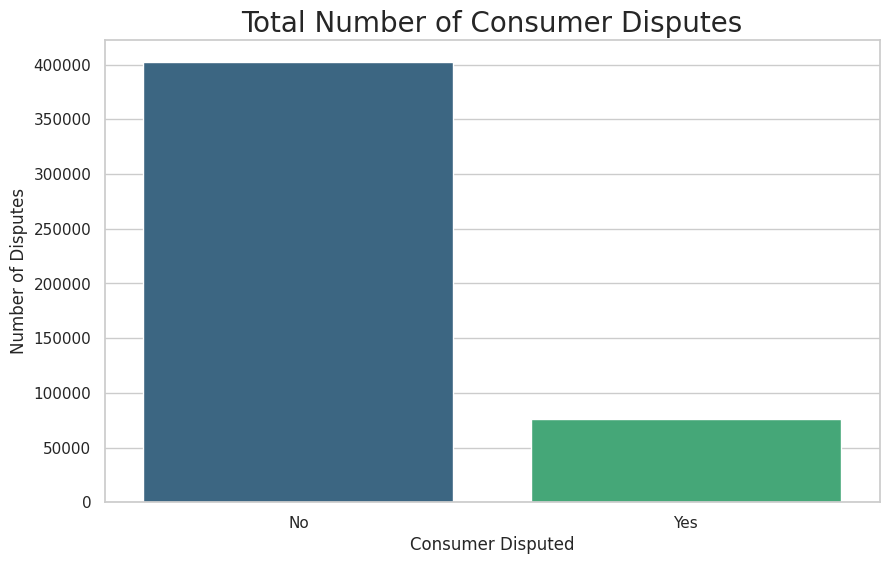

In [23]:
# Step-1:- Initializing the style and figure size of our plot:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Step-2:- counting the number of disputes for each category:
dispute_counts = Consumer_Complaints_df['Consumer disputed?'].value_counts()

# Step-3:- Plotting the bar graph:
bar_plot = sns.barplot(x=dispute_counts.index, y=dispute_counts.values,
                       palette="viridis")

# Step-4:- Adding labels and title:
bar_plot.set(xlabel='Consumer Disputed', ylabel='Number of Disputes')
bar_plot.set_title('Total Number of Consumer Disputes', fontsize=20)

plt.show()

# Task-11:-

**Plot bar graph of the total no of disputes products-wise with the help of seaborn**

In [24]:
# Step-1:- Groupby the 'Product' & 'Consumer disputed?' columns for ploting the graph:
product_dispute_counts = Consumer_Complaints_df.groupby('Product')[
    'Consumer disputed?'].count().reset_index()

# Step-2:- Viewing the starting records of Groupby data:
product_dispute_counts.head()

,Product,Consumer disputed?
0,Bank account or service,54403
1,Consumer Loan,18599
2,Credit card,57358
3,Credit reporting,81111
4,Debt collection,86544


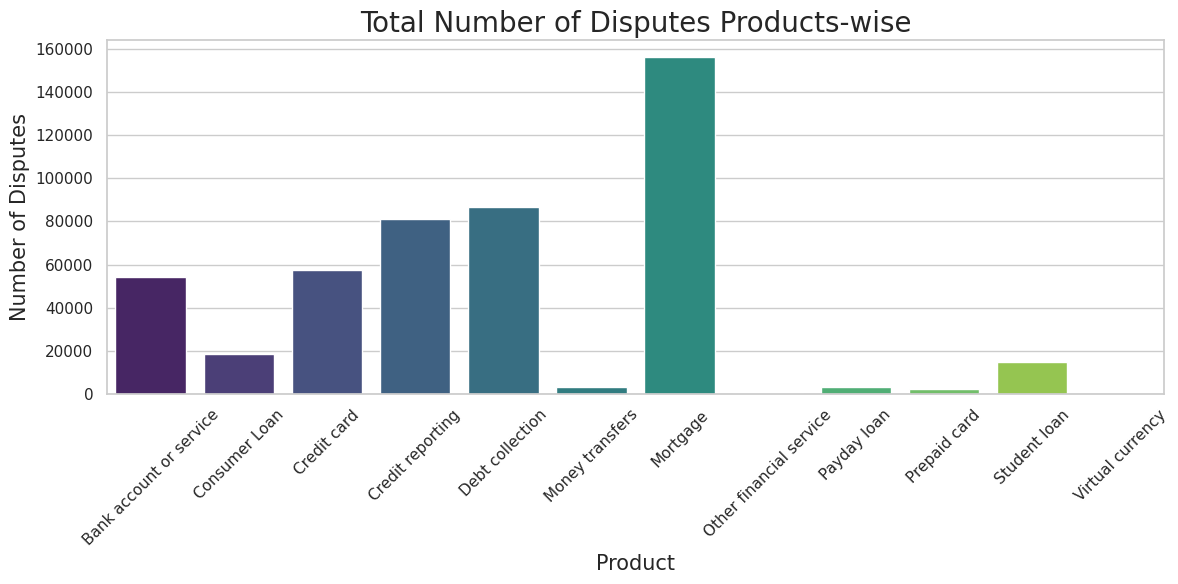

In [25]:
# Step-3:- Initializing the figure size and barplot of our plot:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Consumer disputed?',
            data=product_dispute_counts, palette='viridis')

# Step-4:- Adding labels and title:
plt.xlabel("Product", fontsize=15)
plt.ylabel("Number of Disputes", fontsize=15)
plt.title("Total Number of Disputes Products-wise", fontsize=20)

# Step-5:- Rotate x-axis & Adjust layout for better readability:
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task-12:-

**Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the help of seaborn**

In [26]:
# Step-1:- Groupby the 'Issue' & 'Consumer disputed?' columns for ploting the graph:
issue_dispute_counts = Consumer_Complaints_df.groupby('Issue')[
    'Consumer disputed?'].count().reset_index()


# Step-2:- sorting the top issues by highest disputes:
top_issues = issue_dispute_counts.sort_values(by='Consumer disputed?',
                                              ascending=False).head(10)

# Step-3:- Viewing the starting records of Groupby data:
top_issues.head(10)

,Issue,Consumer disputed?
59,"Loan modification,collection,foreclosure",80302
52,Incorrect information on credit report,58527
60,"Loan servicing, payments, escrow account",51403
26,Cont'd attempts collect debt not owed,36367
1,"Account opening, closing, or management",23568
40,Disclosure verification of debt,16235
25,Communication tactics,15312
39,Deposits and withdrawals,14721
7,"Application, originator, mortgage broker",11200
13,Billing disputes,9600


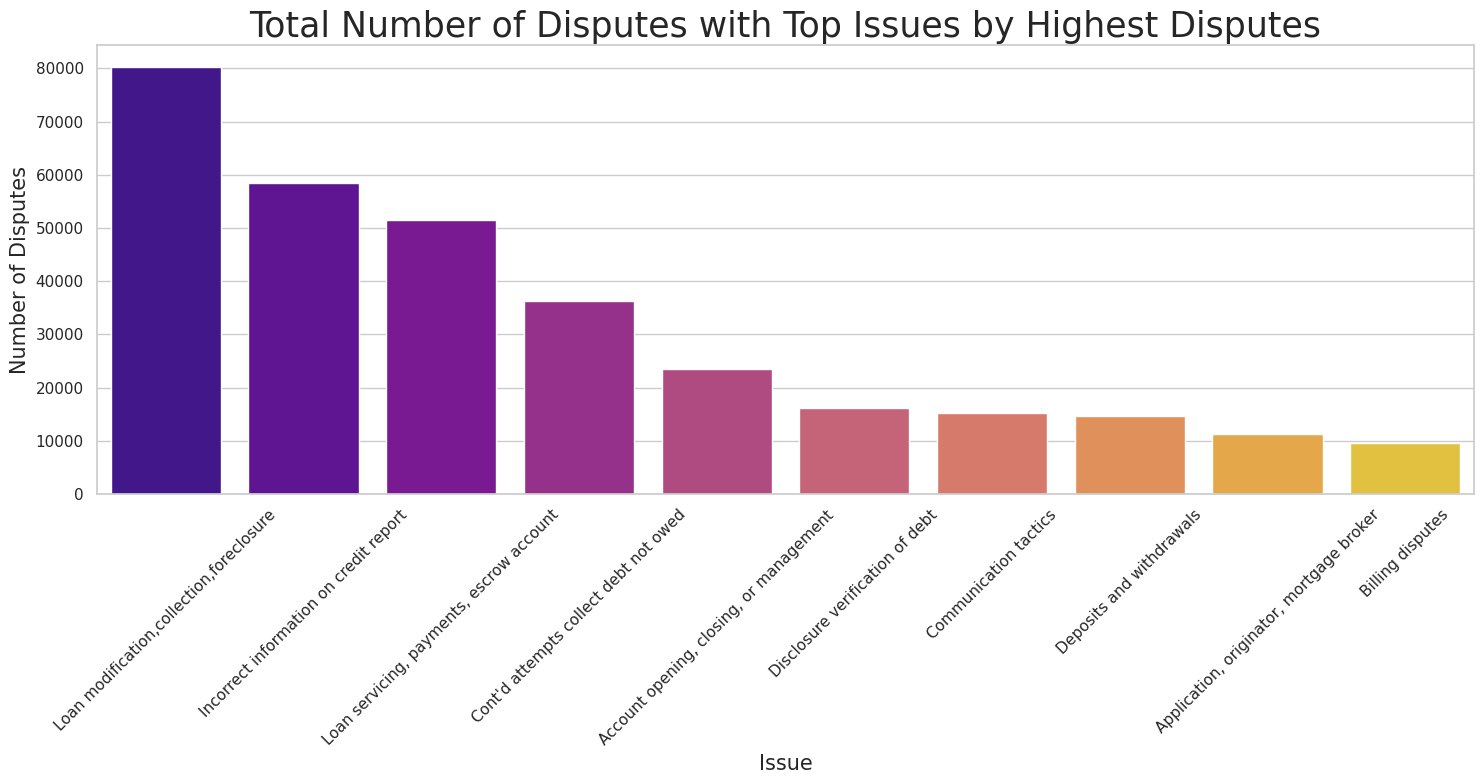

In [27]:
# Step-4:- Initializing the figure size and barplot of our plot:
plt.figure(figsize=(15, 8))
sns.barplot(x='Issue', y='Consumer disputed?', data=top_issues,
            palette='plasma')

# Step-5:- Adding labels and title:
plt.xlabel("Issue", fontsize=15)
plt.ylabel("Number of Disputes", fontsize=15)
plt.title("Total Number of Disputes with Top Issues by Highest Disputes",
          fontsize=25)

# Step-6:- Rotate x-axis & Adjust layout for better readability:
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task-13:-

**Plot bar graph of the total no of disputes by State with Maximum Disputes**

In [28]:
# Step-1:- Groupby the 'State' & 'Consumer disputed?' columns for ploting the graph:
state_dispute_counts = Consumer_Complaints_df.groupby('State')[
    'Consumer disputed?'].count().reset_index()

# Step-2:- Viewing the starting records of Groupby data:
state_dispute_counts.head()

,State,Consumer disputed?
0,AA,8
1,AE,195
2,AK,552
3,AL,4950
4,AP,132


In [29]:
# Step-3:- Calculating the maximum disputes state for annotate:
state_with_max_disputes = state_dispute_counts[state_dispute_counts[
    'Consumer disputed?'] == state_dispute_counts['Consumer disputed?'].
                                               max()]

# Step-4:- Viewing the maximum disputes state:
state_with_max_disputes

,State,Consumer disputed?
8,CA,73840


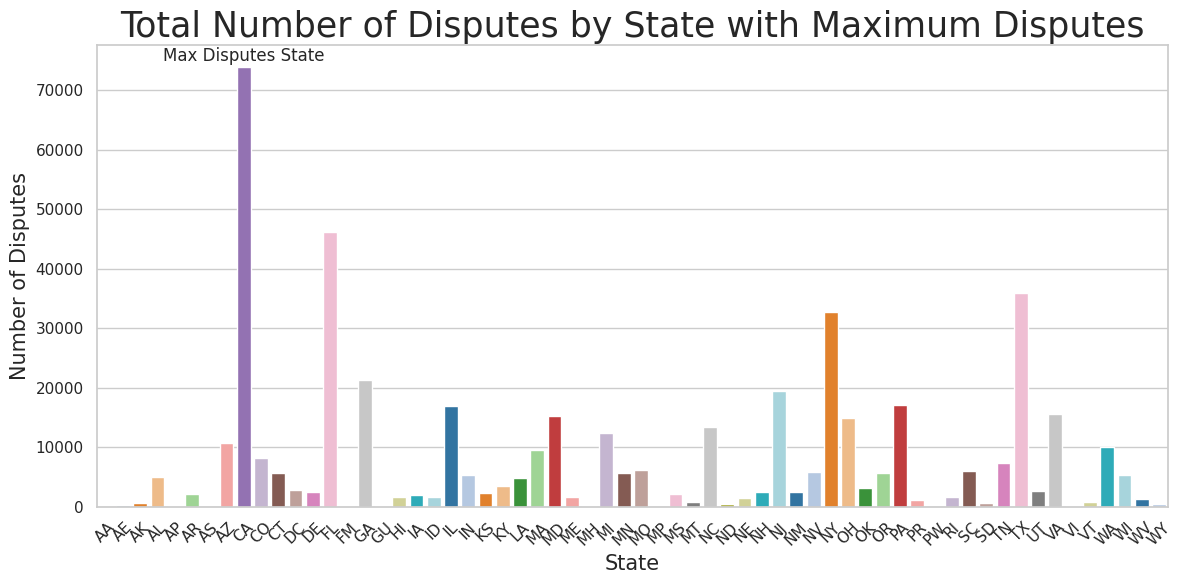

In [30]:
# Step-5:- Initializing the figure size and barplot of our plot:
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Consumer disputed?', data=state_dispute_counts,
            palette='tab20')

# Step-6:- Adding labels and title:
plt.xlabel("State", fontsize=15)
plt.ylabel("Number of Disputes", fontsize=15)
plt.title("Total Number of Disputes by State with Maximum Disputes",
          fontsize=25)

# Step-7:- Rotate x-axis & Adjust layout for better readability:
plt.xticks(rotation=45)
plt.tight_layout()

# Step-8:- Highlighting the state with maximum disputes:
x_coord = state_with_max_disputes.index[0]
y_coord = state_with_max_disputes['Consumer disputed?'].values[0]
label = 'Max Disputes State'
plt.text(x_coord, y_coord + 1000, label, fontsize=12, ha='center')

plt.show()

# Task-14:-

**Plot bar graph of the total no of disputes Submitted Via different source**

In [31]:
# Step-1:- Calculating the total no of disputes Submitted Via different source:
submitted_via_dispute_counts = Consumer_Complaints_df['Submitted via'
                                                        ].value_counts()

# Step-2:- Viewing the total no of disputes Submitted Via different source:
submitted_via_dispute_counts

Web            313915
Referral        91351
Phone           34417
Postal mail     31446
Fax              7031
Email             256
Name: Submitted via, dtype: int64

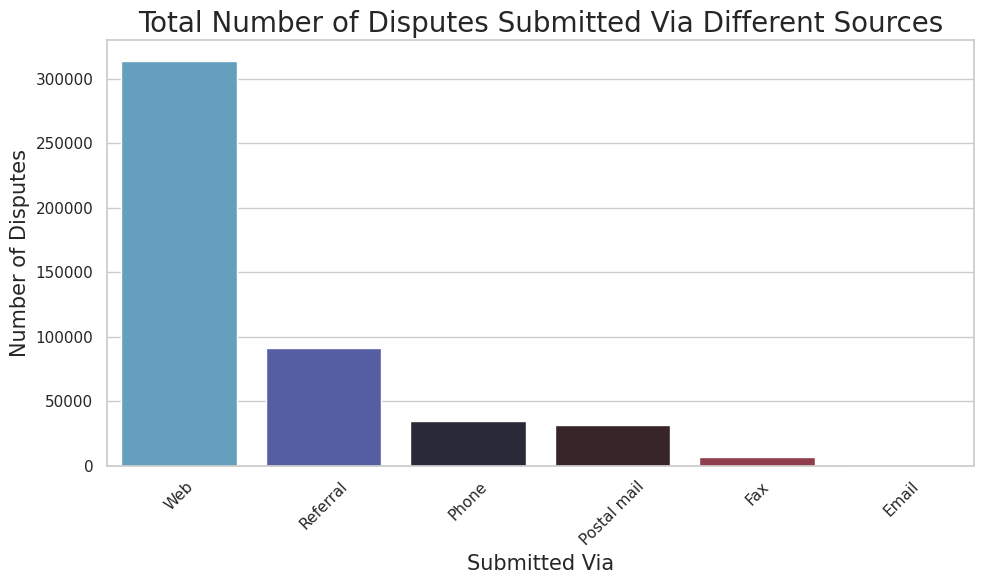

In [32]:
# Step-3:- Initializing the figure size and barplot of our plot:
plt.figure(figsize=(10, 6))
sns.barplot(x=submitted_via_dispute_counts.index,
            y=submitted_via_dispute_counts.values, palette='icefire')

# Step-4:- Adding labels and title:
plt.xlabel("Submitted Via", fontsize=15)
plt.ylabel("Number of Disputes", fontsize=15)
plt.title("Total Number of Disputes Submitted Via Different Sources",
          fontsize=20)

# Step-5:- Rotate x-axis & Adjust layout for better readability:
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task-15:-

**Plot bar graph of the total no of disputes where the Company's Response to the Complaints**

In [33]:
# Step-1:- Groupby the 'Company response to consumer' & 'Consumer disputed?' columns for ploting the graph:
disputes_by_response = Consumer_Complaints_df.groupby(
    'Company response to consumer')['Consumer disputed?'
                                   ].count().reset_index()

# Step-2:- Viewing the starting records of Groupby data:
disputes_by_response.head()

,Company response to consumer,Consumer disputed?
0,Closed,11364
1,Closed with explanation,354307
2,Closed with monetary relief,32925
3,Closed with non-monetary relief,61491
4,Closed with relief,4184


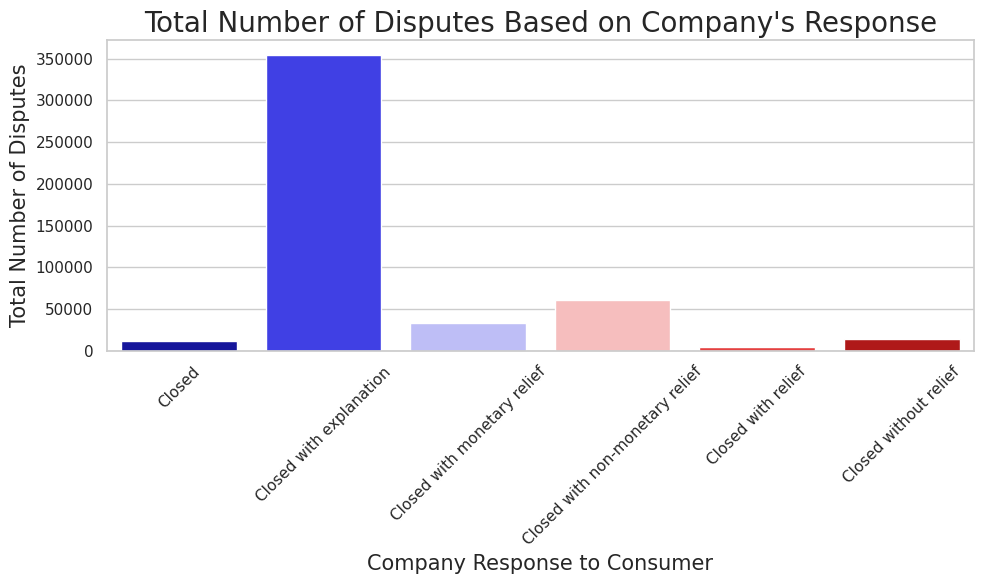

In [34]:
# Step-3:- Initializing the figure size and barplot of our plot:
plt.figure(figsize=(10, 6))
sns.barplot(x='Company response to consumer', y='Consumer disputed?',
            data=disputes_by_response, palette='seismic')

# Step-4:- Adding labels and title:
plt.xlabel("Company Response to Consumer", fontsize=15)
plt.ylabel("Total Number of Disputes", fontsize=15)
plt.title("Total Number of Disputes Based on Company's Response",
          fontsize=20)

# Step-5:- Rotate x-axis & Adjust layout for better readability:
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task-16:-

**Plot bar graph of the total no of disputes where the Company's Response Leads to Disputes**

In [35]:
# Step-1:- Groupby the 'Company response to consumer' & 'Consumer disputed?' columns for ploting the graph:
response_leads_to_disputes = disputed_cons.groupby(
    'Company response to consumer')['Consumer disputed?'
                                   ].count().reset_index()

# Step-2:- Viewing the starting records of Groupby data:
response_leads_to_disputes.head()

,Company response to consumer,Consumer disputed?
0,Closed,1928
1,Closed with explanation,62108
2,Closed with monetary relief,2864
3,Closed with non-monetary relief,5987
4,Closed with relief,426


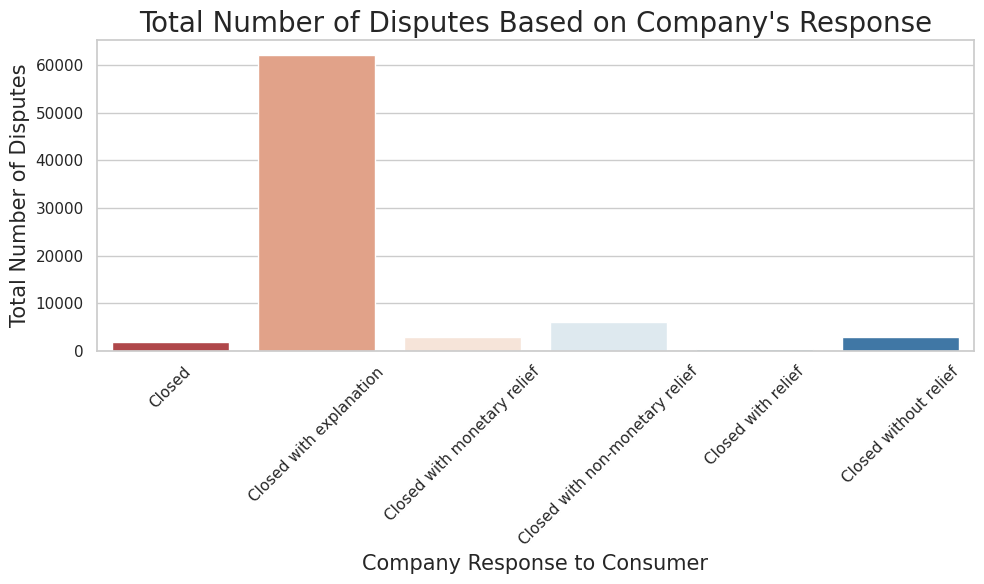

In [36]:
# Step-3:- Initializing the figure size and barplot of our plot:
plt.figure(figsize=(10, 6))
sns.barplot(x='Company response to consumer', y='Consumer disputed?',
            data=response_leads_to_disputes, palette='RdBu')

# Step-4:- Adding labels and title:
plt.xlabel("Company Response to Consumer", fontsize=15)
plt.ylabel("Total Number of Disputes", fontsize=15)
plt.title("Total Number of Disputes Based on Company's Response",
          fontsize=20)

# Step-5:- Rotate x-axis & Adjust layout for better readability:
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task-17:-

**Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely Response**

In [37]:
# Step-1:- Groupby the 'Timely response?' & 'Consumer disputed?' columns for ploting the graph:
disputes_by_timely_response = Consumer_Complaints_df.groupby(
    'Timely response?')['Consumer disputed?'].count().reset_index()

# Step-2:- Viewing the Groupby data:
disputes_by_timely_response

,Timely response?,Consumer disputed?
0,No,8143
1,Yes,470273


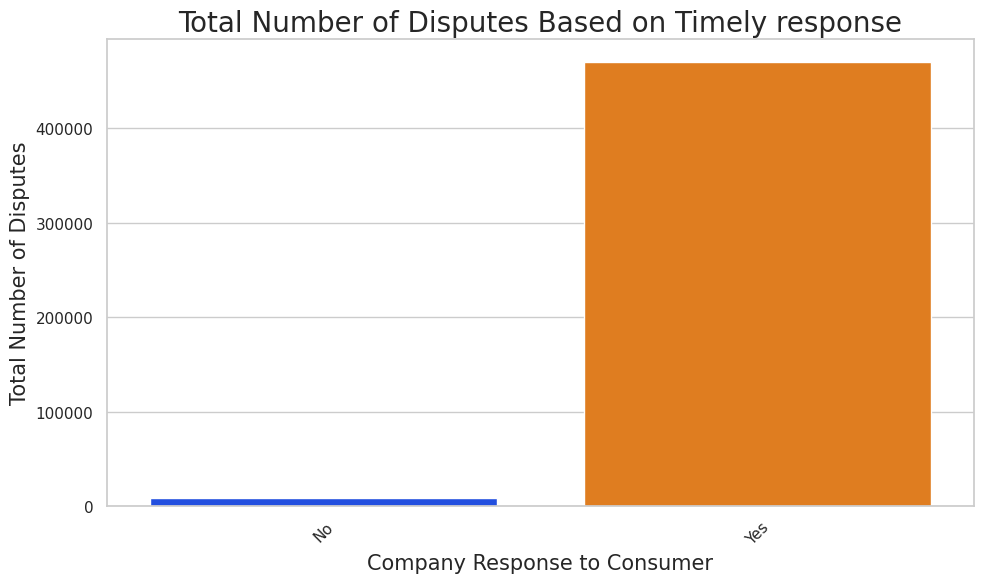

In [38]:
# Step-3:- Initializing the figure size and barplot of our plot:
plt.figure(figsize=(10, 6))
sns.barplot(x='Timely response?', y='Consumer disputed?',
            data=disputes_by_timely_response, palette='bright')

# Step-4:- Adding labels and title:
plt.xlabel("Company Response to Consumer", fontsize=15)
plt.ylabel("Total Number of Disputes", fontsize=15)
plt.title("Total Number of Disputes Based on Timely response",
          fontsize=20)

# Step-5:- Rotate x-axis & Adjust layout for better readability:
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task-18:-

**Plot bar graph of the total no of disputes over Year Wise Complaints**

In [39]:
# Step-1:- Groupby the 'Year' & 'Consumer disputed?' columns for ploting the graph:
disputes_by_Complaints_years = Consumer_Complaints_df.groupby(
    'Year')['Consumer disputed?'].count().reset_index()

# Step-2:- Viewing the Groupby data:
disputes_by_Complaints_years

,Year,Consumer disputed?
0,2011,1947
1,2012,56998
2,2013,85982
3,2014,119670
4,2015,133928
5,2016,79891


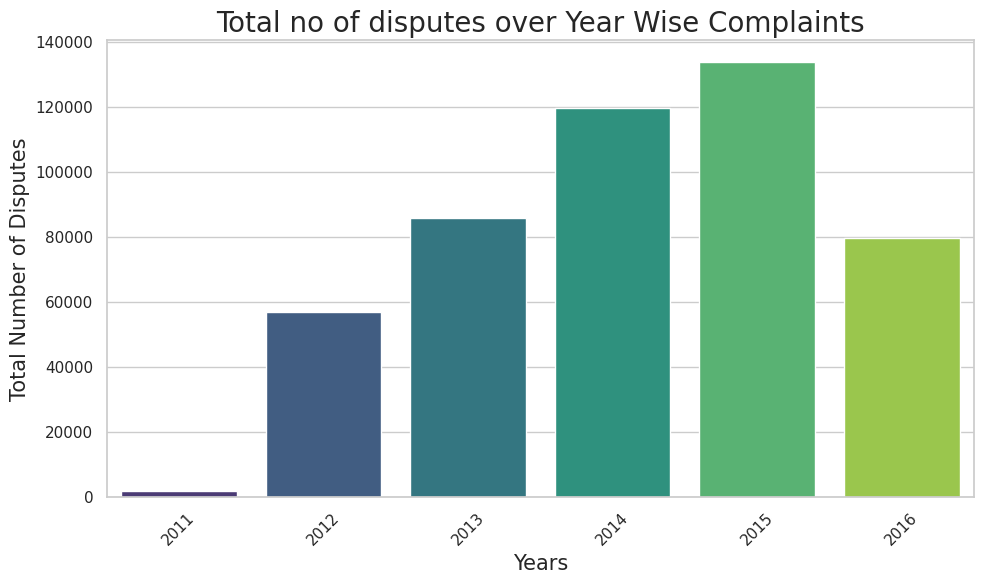

In [40]:
# Step-3:- Initializing the figure size and barplot of our plot:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Consumer disputed?',
            data=disputes_by_Complaints_years, palette='viridis')

# Step-4:- Adding labels and title:
plt.xlabel("Years", fontsize=15)
plt.ylabel("Total Number of Disputes", fontsize=15)
plt.title("Total no of disputes over Year Wise Complaints",
          fontsize=20)

# Step-5:- Rotate x-axis & Adjust layout for better readability:
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task-19:-

**Plot bar graph of the total no of disputes over Year Wise Disputes**

In [41]:
# Step-1:- Groupby the 'Year' & 'Consumer disputed?' columns for ploting the graph:
disputes_by_year_wise_disputes = disputed_cons.groupby('Year')[
    'Consumer disputed?'].count().reset_index()

# Step-2:- Viewing the Groupby data:
disputes_by_year_wise_disputes

,Year,Consumer disputed?
0,2011,346
1,2012,9830
2,2013,13615
3,2014,17814
4,2015,20580
5,2016,13987


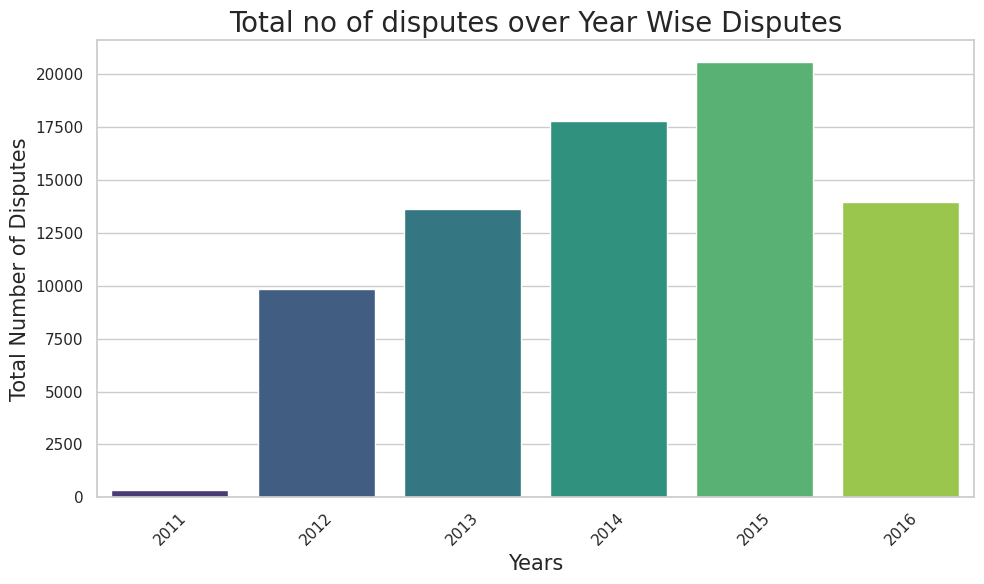

In [42]:
# Step-3:- Initializing the figure size and barplot of our plot:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Consumer disputed?',
            data=disputes_by_year_wise_disputes, palette='viridis')

# Step-4:- Adding labels and title:
plt.xlabel("Years", fontsize=15)
plt.ylabel("Total Number of Disputes", fontsize=15)
plt.title("Total no of disputes over Year Wise Disputes", fontsize=20)

# Step-5:- Rotate x-axis & Adjust layout for better readability:
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task-20:-

**Plot bar graph of Top Companies with Highest Complaints**

In [43]:
# Step-1:- Groupby the 'Company' & 'Consumer disputed?' columns for ploting the graph:
issue_dispute_counts = Consumer_Complaints_df.groupby(
    'Company')['Consumer disputed?'].count().reset_index()

# Step-2:- Sorting the top companies with highest complaints:
top_issues = issue_dispute_counts.sort_values(
    by='Consumer disputed?', ascending=False).head(10)

# Step-3:- Viewing the Sorted data:
top_issues

,Company,Consumer disputed?
399,Bank of America,46336
3192,Wells Fargo & Company,35453
1594,JPMorgan Chase & Co.,28852
1076,Equifax,28831
1102,Experian,26792
3008,"TransUnion Intermediate Holdings, Inc.",22508
668,Citibank,22300
2195,Ocwen,17475
585,Capital One,13396
2101,Nationstar Mortgage,11278


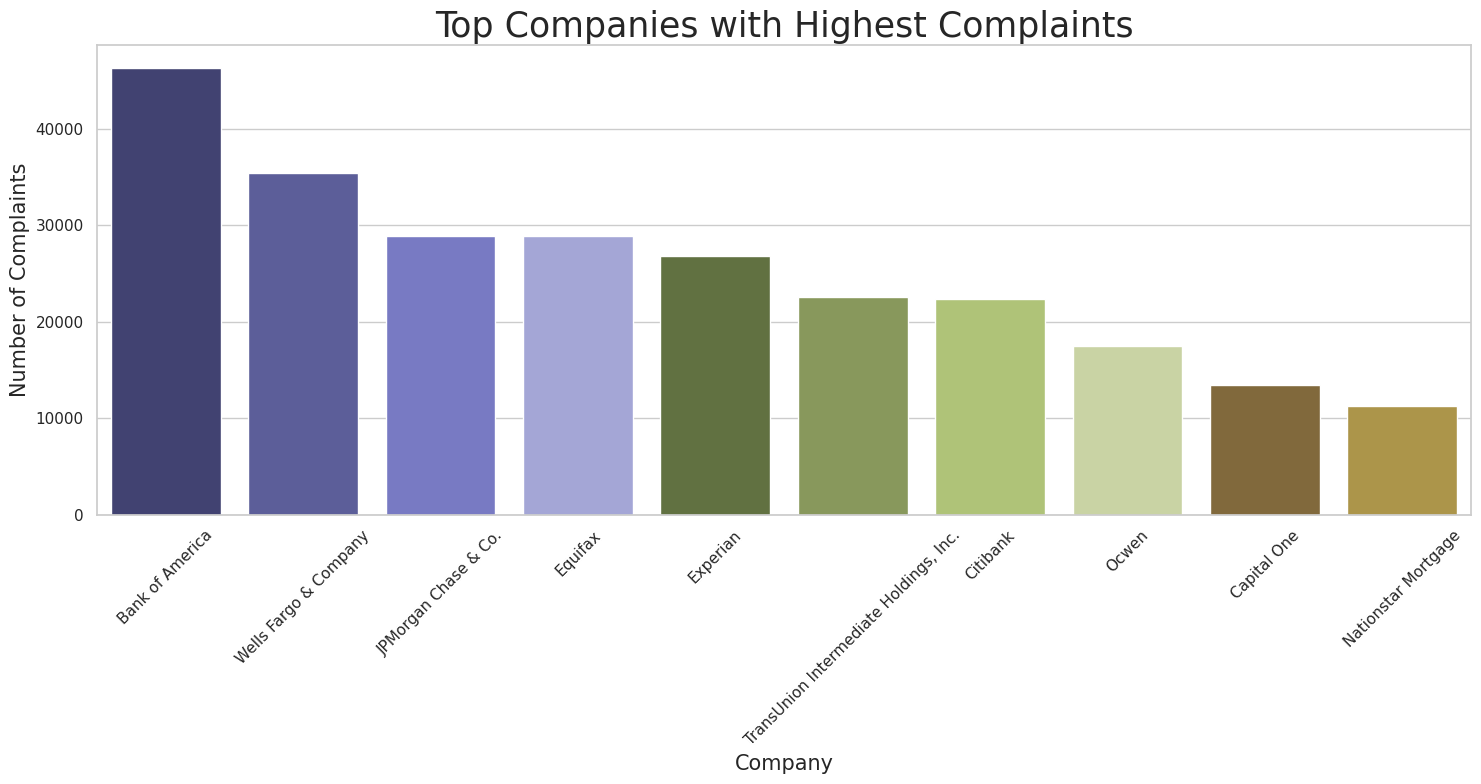

In [44]:
# Step-4:- Initializing the figure size and barplot of our plot:
plt.figure(figsize=(15, 8))
sns.barplot(x='Company', y='Consumer disputed?',
            data=top_issues, palette='tab20b')

# Step-5:- Adding labels and title:
plt.xlabel("Company", fontsize=15)
plt.ylabel("Number of Complaints", fontsize=15)
plt.title("Top Companies with Highest Complaints", fontsize=25)

# Step-6:- Rotate x-axis & Adjust layout for better readability:
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task-21:-

**Converte all negative days held to zero (it is the time taken by the authority that can't be negative)**

In [45]:
# Step-1:- Printing out the records before replacing all the negative values:
print('Printing out the few records of our Days held column before replacing all the  negative numbers:- \n',
      Consumer_Complaints_df['Days held'].tail(5),'\n')

# Step-2:- Replace all the negative values in "Days held" column with 0:
Consumer_Complaints_df["Days held"] = np.where(
    Consumer_Complaints_df["Days held"] < 0, 0,
    Consumer_Complaints_df["Days held"])

# Step-3:- Printing out the records after replacing all the negative values:
print('Printing out the few records of our Days held column after replacing all the   negative numbers:- \n',
      Consumer_Complaints_df['Days held'].tail(5))

Printing out the few records of our Days held column before replacing all the  negative numbers:- 
 358805    -1
358806     4
358807     0
358808     4
358809    22
Name: Days held, dtype: int64 

Printing out the few records of our Days held column after replacing all the   negative numbers:- 
 358805     0
358806     4
358807     0
358808     4
358809    22
Name: Days held, dtype: int64


# Task-22:-

**Drop Unnecessary Columns for the Model Building
like:'Company', 'State', 'Year_Received', 'Days_held'**

In [46]:
# Step-1:- Checking the shape,cloumns of our Consumer_Complaints_df data before droping all the columns:
print('Shape of the Consumer_Complaints_df Dataset before droping all the columns is:- \n',
      Consumer_Complaints_df.shape,'\n')

print('Columns of Consumer_Complaints_df Dataset before droping all the columns:- \n',
     Consumer_Complaints_df.columns,'\n')

# Step-2:- Droping 'Company', 'State', 'Week_Received', 'Days_held' columns:
Consumer_Complaints_df.drop(columns=['Company', 'State','Week_Received',
                                        'Days held'], inplace=True)

# Step-3:- Checking the shape,cloumns of our Consumer_Complaints_df data after droping all the columns:
print('Shape of the Consumer_Complaints_df Dataset after droping all the columns is:- \n',
      Consumer_Complaints_df.shape,'\n')

print('Columns of Consumer_Complaints_df Dataset after droping all the columns:- \n',
     Consumer_Complaints_df.columns,'\n')

Shape of the Consumer_Complaints_df Dataset before droping all the columns is:- 
 (478416, 13) 

Columns of Consumer_Complaints_df Dataset before droping all the columns:- 
 Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Day', 'Month', 'Year', 'Days held',
       'Week_Received'],
      dtype='object') 

Shape of the Consumer_Complaints_df Dataset after droping all the columns is:- 
 (478416, 9) 

Columns of Consumer_Complaints_df Dataset after droping all the columns:- 
 Index(['Product', 'Issue', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Day', 'Month', 'Year'],
      dtype='object') 



# Task-23:-

**Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)**

In [47]:
# Step-1:- Printing out the Consumer Disputed Column values before replace:
print('Before changing the values of Consumer disputed? Column are:- ',
     Consumer_Complaints_df['Consumer disputed?'].unique())

# Step-2:- Replace the values of "Consumer Disputed" column "Yes" to 1 & "No" to 0:
Consumer_Complaints_df["Consumer disputed?"] = Consumer_Complaints_df[
    "Consumer disputed?"].replace({"Yes": 1, "No": 0})

# Step-3:- Printing out the Consumer Disputed Column values after replace:
print('After changing the values of Consumer disputed? Column are:- ',
     Consumer_Complaints_df['Consumer disputed?'].unique())

Before changing the values of Consumer disputed? Column are:-  ['No' 'Yes']
After changing the values of Consumer disputed? Column are:-  [0 1]


# Task-24:-

**Create Dummy Variables for categorical features and concat with the original data frame like: 'Product,’ 'Submitted via,’ 'Company response to consumer,’ 'Timely response?'**

In [48]:
# Step-1:- Checking the shape,cloumns of our Consumer_Complaints_df data before Create Dummy Variables for categorical features:
print('Shape of the Consumer_Complaints_df Dataset before Create Dummy Variables is:- \n',
      Consumer_Complaints_df.shape,'\n')

print('Columns of Consumer_Complaints_df Dataset before Create Dummy Variables is:- \n',
     Consumer_Complaints_df.columns,'\n')

Shape of the Consumer_Complaints_df Dataset before Create Dummy Variables is:- 
 (478416, 9) 

Columns of Consumer_Complaints_df Dataset before Create Dummy Variables is:- 
 Index(['Product', 'Issue', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Day', 'Month', 'Year'],
      dtype='object') 



In [49]:
# Step-2:- Specify the categorical features to create dummy variables:
categorical_features = ['Product', 'Submitted via',
                        'Company response to consumer', 'Timely response?']

# Step-3:- Create dummy variables for the categorical features:
dummy_variables = pd.get_dummies(Consumer_Complaints_df[
    categorical_features]).astype(int)

# Step-4:- Concatenate the original DataFrame with the dummy variables:
Consumer_Complaints_df = pd.concat([Consumer_Complaints_df,
                                       dummy_variables], axis=1)

# Step-5:- Drop the original categorical features from the DataFrame:
Consumer_Complaints_df.drop(columns=categorical_features, inplace=True)

# Step-6:- Checking the shape,cloumns of our Consumer_Complaints_df data after Create Dummy Variables for categorical features:
print('Shape of the Consumer_Complaints_df Dataset after Create Dummy Variables is:- \n',
      Consumer_Complaints_df.shape,'\n')

print('Columns of Consumer_Complaints_df Dataset after Create Dummy Variables is:- \n',
     Consumer_Complaints_df.columns,'\n')

Shape of the Consumer_Complaints_df Dataset after Create Dummy Variables is:- 
 (478416, 31) 

Columns of Consumer_Complaints_df Dataset after Create Dummy Variables is:- 
 Index(['Issue', 'Consumer disputed?', 'Day', 'Month', 'Year',
       'Product_Bank account or service', 'Product_Consumer Loan',
       'Product_Credit card', 'Product_Credit reporting',
       'Product_Debt collection', 'Product_Money transfers',
       'Product_Mortgage', 'Product_Other financial service',
       'Product_Payday loan', 'Product_Prepaid card', 'Product_Student loan',
       'Product_Virtual currency', 'Submitted via_Email', 'Submitted via_Fax',
       'Submitted via_Phone', 'Submitted via_Postal mail',
       'Submitted via_Referral', 'Submitted via_Web',
       'Company response to consumer_Closed',
       'Company response to consumer_Closed with explanation',
       'Company response to consumer_Closed with monetary relief',
       'Company response to consumer_Closed with non-monetary relief',


In [50]:
# Step-7:- Viewing the starting few records of dummy variables:

Consumer_Complaints_df.head()

,Issue,Consumer disputed?,Day,Month,Year,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,Customer service / Customer relations,0,17,1,2015,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
1,Payment to acct not credited,0,22,6,2016,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,Credit line increase/decrease,0,4,9,2015,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,Problems when you are unable to pay,0,17,5,2016,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,Improper contact or sharing of info,0,7,7,2016,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1


# Task-25:-

**Scaling the Data Sets (note: discard dependent variable before doing standardization)and Make feature Selection with the help of PCA up to 80% of the information.**

In [51]:
# Step-1:- Separate the dependent variable from the independent variable:
X = Consumer_Complaints_df.drop(columns=['Consumer disputed?'])
y = Consumer_Complaints_df['Consumer disputed?']

# Step-2:- Using Label encode to encode the 'Issue' column:
label_encoder = LabelEncoder()
X['Issue'] = label_encoder.fit_transform(X['Issue'])

# Step-3:- Standardize the independent variables:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step-4:- Perform PCA to reduce dimensionality and retaining 17 principal components:
pca = PCA(n_components=17)
X_pca = pca.fit_transform(X_scaled)

# Step-5:- Print the number of principal components selected:
print('Number of principal components selected:- ', pca.n_components_)

# Step-6:- Convert the PCA results back to DataFrame:
X_pca_df = pd.DataFrame(X_pca, columns=[
    f"pc{i}" for i in range(1, pca.n_components_ + 1)])

# Step-7:- Concatenate the dependent variable (target) with the principal components:
X_pca_df = pd.DataFrame(X_pca, columns=[
    f"pc{i}" for i in range(1, pca.n_components_ + 1)])

X_pca_df['Consumer disputed?'] = y.reset_index(drop=True)

# Step-8:- Viewing the starting few records of X_pca_df:
X_pca_df.head()

Number of principal components selected:-  17


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,Consumer disputed?
0,0.298576,0.016297,3.164878,-0.914229,-1.705521,2.097000,0.431456,-0.820568,1.464607,-2.047689,-0.566005,0.203477,-0.371553,0.275568,-0.046153,-0.277214,0.156497,0
1,-0.239313,-0.326541,-1.290896,-0.498536,1.248096,2.781953,-2.668176,3.124714,1.711138,0.761144,2.674074,-0.023000,-0.224675,0.572665,1.448074,0.584155,-0.445088,0
2,0.811096,-0.373359,0.400981,-1.156006,-1.157076,0.659692,1.713887,0.438289,-0.081244,-0.845691,0.161576,0.210998,0.174644,-0.064320,-0.791277,-0.730472,0.283647,0
3,1.403542,-0.821610,1.176734,2.487485,0.153747,1.891814,-2.673015,0.805439,0.819348,0.268698,3.157523,0.012539,0.093764,0.691800,0.947777,0.252269,-0.283772,0
4,1.973751,-0.308468,-0.608182,-1.009096,-0.093171,-0.891122,-0.486712,0.166003,0.056787,-0.424317,0.399229,-0.054410,-0.074269,0.099021,-0.639543,-0.793451,0.320533,0


# Task-26:-

**Splitting the Data Sets Into X and Y by the dependent and independent variables (data selected by PCA)**

In [52]:
#Step-1:- Separate the target variable and the feature vectors:
X = X_pca_df.drop(['Consumer disputed?'], axis=1)
y = X_pca_df['Consumer disputed?']

#Step-2:- To check the shape of X & y:
print("The shape of our X is:- ",X.shape)
print("The shape of our y is:- ",y.shape)

#Step-3:- Checking the X data:
X.head()

The shape of our X is:-  (478416, 17)
The shape of our y is:-  (478416,)


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17
0,0.298576,0.016297,3.164878,-0.914229,-1.705521,2.097000,0.431456,-0.820568,1.464607,-2.047689,-0.566005,0.203477,-0.371553,0.275568,-0.046153,-0.277214,0.156497
1,-0.239313,-0.326541,-1.290896,-0.498536,1.248096,2.781953,-2.668176,3.124714,1.711138,0.761144,2.674074,-0.023000,-0.224675,0.572665,1.448074,0.584155,-0.445088
2,0.811096,-0.373359,0.400981,-1.156006,-1.157076,0.659692,1.713887,0.438289,-0.081244,-0.845691,0.161576,0.210998,0.174644,-0.064320,-0.791277,-0.730472,0.283647
3,1.403542,-0.821610,1.176734,2.487485,0.153747,1.891814,-2.673015,0.805439,0.819348,0.268698,3.157523,0.012539,0.093764,0.691800,0.947777,0.252269,-0.283772
4,1.973751,-0.308468,-0.608182,-1.009096,-0.093171,-0.891122,-0.486712,0.166003,0.056787,-0.424317,0.399229,-0.054410,-0.074269,0.099021,-0.639543,-0.793451,0.320533


In [53]:
#Step-4:- Checking the y data:

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Consumer disputed?, dtype: int64

# Task-27:-

**Build given models and measure their test and validation accuracy:**

- LogisticRegression
- DecisionTreeClassifier
- RandomForestClassifier
- AdaBoostClassifier
- GradientBoostingClassifier
- KNeighborsClassifier
- XGBClassifier

In [54]:
#Step-1:- Split our dataset into train and test datasets for Build above models:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                            test_size=0.2, random_state= 7)


#Step-2:- To check the shape of "X_train", "X_test" & "y_train", "y_test":
print("The shape of X_train is:- ", X_train.shape)
print("The shape of X_test is:- ", X_test.shape)
print("The shape of y_train is:- ", y_train.shape)
print("The shape of y_test is:- ", y_test.shape)

The shape of X_train is:-  (382732, 17)
The shape of X_test is:-  (95684, 17)
The shape of y_train is:-  (382732,)
The shape of y_test is:-  (95684,)


In [55]:
#Step-3:- Initializing all the models:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

#Step-4:- Train and evaluate all the models:
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    accuracies[name] = test_acc
    print(f"{name}:")
    print(f" - Training Accuracy: {train_acc:.4f}")
    print(f" - Testing Accuracy: {test_acc:.4f}")

Logistic Regression:
 - Training Accuracy: 0.8407
 - Testing Accuracy: 0.8411
Decision Tree:
 - Training Accuracy: 0.8868
 - Testing Accuracy: 0.8040
Random Forest:
 - Training Accuracy: 0.8867
 - Testing Accuracy: 0.8166
AdaBoost:
 - Training Accuracy: 0.8407
 - Testing Accuracy: 0.8412
Gradient Boosting:
 - Training Accuracy: 0.8409
 - Testing Accuracy: 0.8414
K-Nearest Neighbors:
 - Training Accuracy: 0.8451
 - Testing Accuracy: 0.8222
XGBoost:
 - Training Accuracy: 0.8432
 - Testing Accuracy: 0.8427


# Task-28:-

**Whoever gives the most accurate result uses it and predicts the outcome for the test file and fills its dispute column so the business team can take some action accordingly**

In [56]:
#Step-1:- Selecting the best model with the highest accuracy:
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

#Step-2:- Printing out the best model:
print('The best model is:- ', best_model_name)

#Step-3:- Predict the outcome for the test file:
test_predictions = best_model.predict(X_test)

#Step-4:- Fill the 'Consumer disputed?' column with the predicted outcomes:
predicted_df = X_test.copy()
predicted_df['Consumer disputed?'] = test_predictions

# Step-5:- Viewing the starting few records of predicted_df:
predicted_df.head()

The best model is:-  XGBoost


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,Consumer disputed?
367441,1.337348,-0.855960,-1.207282,0.438400,-0.427569,2.446685,-1.872414,0.256753,1.852043,0.168788,3.219346,0.766537,-0.200711,0.639609,0.540741,-0.256228,-0.029262,0
345399,-0.913249,0.484818,0.485470,-3.485761,1.871910,0.273186,-0.680223,1.440425,-0.267793,2.043252,-0.533594,0.226517,0.656443,-0.405867,-0.413172,-0.628330,0.231446,0
442699,-1.909735,0.067531,-1.625414,0.200480,0.476555,-0.291973,-0.439256,-1.231131,0.718552,-0.505410,0.116197,-0.067750,0.195635,-0.261292,-0.943986,-0.792549,0.283206,0
462152,1.233931,-0.915788,-0.164757,0.319670,0.468513,0.177244,0.936635,-0.757672,0.497150,0.608555,-0.096003,0.182712,0.330986,-0.335187,-0.230393,-0.287429,0.143068,0
245511,-0.193571,-0.885260,-0.498853,0.865290,3.123962,0.723427,2.389779,0.737873,-0.469292,-0.034788,-0.063584,1.408456,-1.260058,-0.262072,-0.785734,-0.738248,0.344926,0


# Submitted by Biswakant Nayak